**Проект: Статистический анализ данных**

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
1. без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;
2. с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

**Описание данных**
В основных данных есть информация о пользователях, их поездках и подписках.
Пользователи — `users_go.csv`

- `user_id` — уникальный идентификатор пользователя
- `name` — имя пользователя
- `age` — возраст
- `city` — город
- `subscription_type` — тип подписки (free, ultra)

Поездки — `rides_go.csv` 

- `user_id` — уникальный идентификатор пользователя
- `distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `dateдата` — совершения поездки

Подписки — `subscriptions_go.csv`

- `subscription_type` — тип подписки
- `minute_price` — стоимость одной минуты поездки по данной подписке
- `start_ride_price` — стоимость начала поездки
- `subscription_fee` — стоимость ежемесячного платежа

In [1]:
# Импортируем необходимые библиотеки

# pandas для работы с данными в табличном виде (DataFrame)
import pandas as pd

# numpy для работы с массивами и математическими функциями
import numpy as np 

# импортируем функцию factorial для вычисления факториала, exp для экспоненты и sqrt для извлечения квадратного корня
from math import factorial, exp, sqrt

# для построения графиков
import matplotlib.pyplot as plt 

# scipy предоставляет статистические функции и тесты
from scipy import stats as st
# Импортируем распределения для работы с биномиальным и пуассоновским распределениями, а также нормальным распределением
from scipy.stats import binom, poisson, norm

# seaborn для удобного построения статистических графиков
import seaborn as sns

#### Шаг 1. Загрузка данных

1.1 Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. Пути к файлам:
- /datasets/users_go.csv
- /datasets/rides_go.csv
- /datasets/subscriptions_go.csv
1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

In [2]:
# Считываем CSV-файлы с данными и сохраняем их в датафреймы
# Чтение данных о пользователях и сохранение в датафрейм df_users

url_user_go = 'https://code.s3.yandex.net/datasets/users_go.csv'

df_users = pd.read_csv(url_user_go)
# Чтение данных о поездках и сохранение в датафрейм df_rides

url_rides_go = 'https://code.s3.yandex.net/datasets/rides_go.csv'
df_rides = pd.read_csv(url_rides_go)
# Чтение данных о подписках и сохранение в датафрейм df_sub

url_sub_go = 'https://code.s3.yandex.net/datasets/subscriptions_go.csv'
df_sub = pd.read_csv(url_sub_go)
# Выводим общую информацию о датафрейме df_users, чтобы понять структуру данных (типы столбцов, количество ненулевых значений)
df_users.info()
# Выводим первые несколько строк из df_users, чтобы изучить данные
display(df_users.head())
# Выводим строку 'rides' для наглядности (пометка для следующей части анализа)
display('rides')
# Выводим общую информацию о датафрейме df_rides
df_rides.info()
# Выводим первые несколько строк из df_rides, чтобы изучить данные
display(df_rides.head())
# Выводим строку 'sub' для наглядности (пометка для следующей части анализа)
display('sub')
# Выводим общую информацию о датафрейме df_sub
df_sub.info()
# Выводим первые несколько строк из df_sub, чтобы изучить данные
display(df_sub.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


'rides'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


'sub'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Вывод.** загрузил CSV-файлы с данными с помощью библиотеки pandas и сохранил их в датафреймах. Вывел первые строки каждого набора данных. Изучил общую информацию о каждом датафрейме. 


#### Шаг 2. Предобработка данных

2.1 Приведите столбец `date` к типу даты pandas.

In [3]:
# Приводим столбец 'date' в датафрейме df_rides к типу datetime для удобства работы с датами
df_rides['date'] = pd.to_datetime(df_rides['date'])

# Выводим общую информацию о датафрейме df_rides, чтобы убедиться, что столбец 'date' преобразован в правильный тип
df_rides.info()

# Выводим первые несколько строк датафрейма df_rides, чтобы проверить преобразование столбца 'date'
display(df_rides.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


2.2 Создайте новый столбец с номером месяца на основе столбца `date`.

In [4]:
# Создаём новый столбец 'month_number', который будет содержать номер месяца, извлечённый из столбца 'date'
df_rides['month_number'] = df_rides['date'].dt.month

# Выводим первые строки датафрейма df_rides, чтобы проверить добавление нового столбца
df_rides.head()

,user_id,distance,duration,date,month_number
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

In [5]:
# Метод .duplicated() возвращает серию булевых значений, где True — это дубликат. Мы суммируем их, чтобы узнать общее количество дубликатов.
display(df_users.duplicated().sum())

# Проверяем на наличие дубликатов в датафрейме df_rides
display(df_rides.duplicated().sum())

# Проверяем на наличие дубликатов в датафрейме df_sub
display(df_sub.duplicated().sum()) 

31

0

0

In [6]:
# Удаляем дубликаты из датафрейма df_users, если они присутствуют
df_users = df_users.drop_duplicates()

# Проверяем, остались ли дубликаты в датафрейме df_users после удаления
display(df_users.duplicated().sum()) 

0

**Вывод.** Все типы данных были правильны, кроме стобцы `date` в талице поездок (df_rides). Создал новый столбец с номером месяца на основе столбца date. Проверил наличие дубликатов. Дубликаты присутствовали в таблице пользователей (df_users) в количестве 31 ед. Убрал все дубликаты 

#### Шаг 3. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:

3.1 частота встречаемости городов;

,user_id,percent
city,,
Пятигорск,219,14.28
Екатеринбург,204,13.30
Ростов-на-Дону,198,12.91
Краснодар,193,12.58
Сочи,189,12.32
Омск,183,11.93
Тюмень,180,11.73
Москва,168,10.95


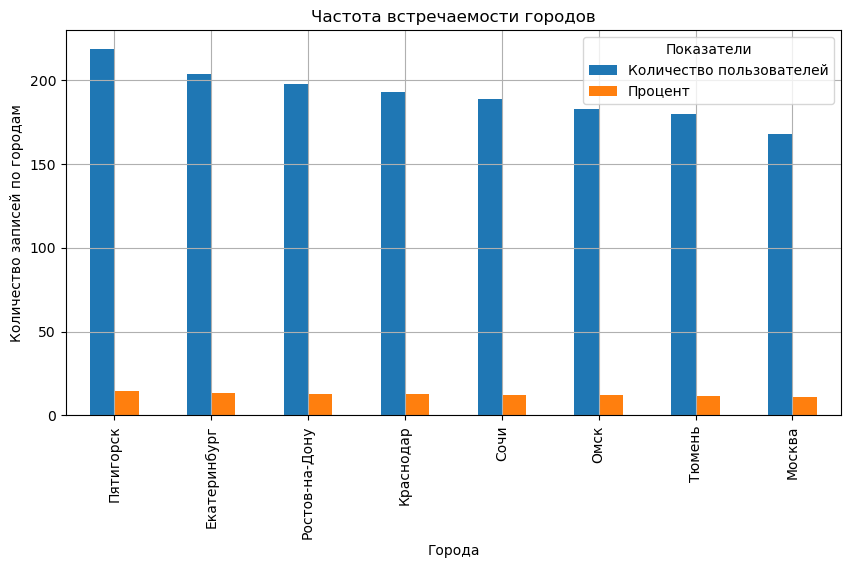

In [29]:
# Создаём сводную таблицу для подсчёта количества пользователей по каждому городу
df_users_city = df_users.pivot_table(index='city',  # Индексируем по столбцу 'city'
                                     values='user_id',  # Используем столбец 'user_id' для подсчёта
                                     aggfunc='count')  # Аггрегируем, считая количество уникальных пользователей
# Сортируем города по количеству пользователей (по убыванию)
df_users_city = df_users_city.sort_values(by='user_id', ascending=False)

# Рассчитываем процентное соотношение количества пользователей по каждому городу
df_users_city['percent'] = (100 * df_users_city['user_id'] / df_users_city['user_id'].sum()).round(2)

# Отображаем таблицу с количеством пользователей и процентным распределением
display(df_users_city)

# Строим столбчатую диаграмму для визуализации частоты встречаемости городов
df_users_city.plot(kind='bar', grid=True, figsize=(10, 5))

# Добавляем заголовок и подписи осей
plt.title('Частота встречаемости городов')
plt.xlabel('Города')
plt.ylabel('Количество записей по городам')

# Добавляем легенду с соответствующими метками
plt.legend(title='Показатели', labels=['Количество пользователей', 'Процент'])

# Отображаем график
plt.show()

**Вывод.**
В таблице всего 8 городов из которых в топ-3 входят Пятигорск (14.3%), Екатеринбург (13.3%) и Ростов-на-Дону (12.91%)

3.2 соотношение пользователей с подпиской и без подписки;

,user_id,percent
subscription_type,,
free,835,54.43
ultra,699,45.57


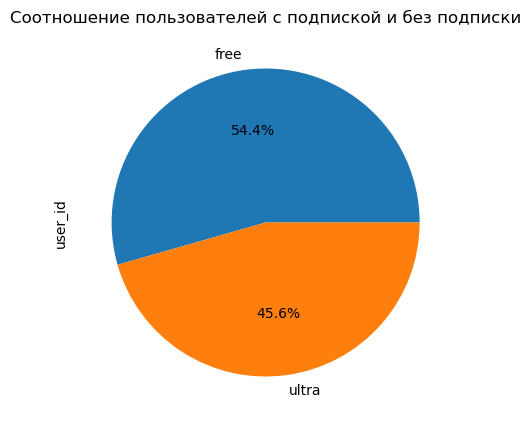

In [8]:
# Создаём сводную таблицу для подсчёта количества пользователей по типу подписки
df_users_sub = df_users.pivot_table(index='subscription_type',  # Индексируем по типу подписки
                                    values='user_id',  # Используем столбец 'user_id' для подсчёта
                                    aggfunc='count')  # Аггрегируем, считая количество пользователей
# Сортируем по количеству пользователей (по убыванию)
df_users_sub = df_users_sub.sort_values(by='user_id', ascending=False)

# Рассчитываем процентное соотношение пользователей по каждому типу подписки
df_users_sub['percent'] = (100 * df_users_sub['user_id'] / df_users_sub['user_id'].sum()).round(2)

# Создаём отдельную переменную с процентами для дальнейшей визуализации
df_users_sub_per = (100 * df_users_sub['user_id'] / df_users_sub['user_id'].sum()).round(2)

# Отображаем таблицу с количеством пользователей и процентным распределением
display(df_users_sub)

# Строим круговую диаграмму для визуализации соотношения пользователей с подпиской и без
df_users_sub_per.plot(kind='pie', grid=True, figsize=(5, 5), autopct='%1.1f%%', labels=df_users_sub.index)

# Добавляем заголовок графика
plt.title('Соотношение пользователей с подпиской и без подписки')

# Отображаем график
plt.show()

**Вывод.** Бесплатные - подписки 54.43%, платные - 45.57%

3.3 возраст пользователей;

age
25    145
24    132
26    131
23    129
22    119
27    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
16     19
34     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: count, dtype: int64

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

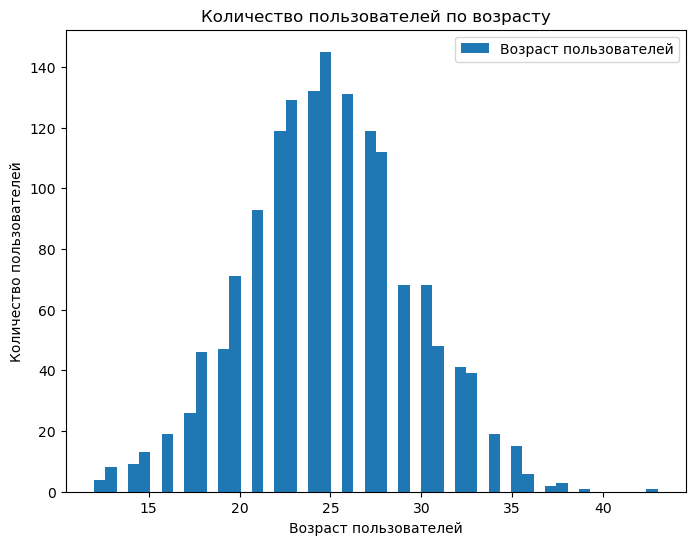

In [9]:
# Выводим количество пользователей по каждому возрасту (считаем уникальные значения возраста)
display(df_users['age'].value_counts())

# Выводим статистическое описание возрастов (среднее, стандартное отклонение, минимальное, максимальное значения и т.д.)
display(df_users['age'].describe())

# Строим гистограмму для отображения распределения возраста пользователей
plt.figure(figsize=(8, 6))  # Устанавливаем размер графика
plt.hist(df_users['age'], bins=50, label='Возраст пользователей')  # Создаём гистограмму с 50 корзинами (bins)

# Добавляем заголовок и подписи осей
plt.title('Количество пользователей по возрасту')
plt.xlabel('Возраст пользователей')
plt.ylabel('Количество пользователей')

# Добавляем легенду
plt.legend(loc='upper right')  

# Отображаем график
plt.show()

**Вывод.** Возраст пользователей разные и  варьируется 12 - 43 лет. Возраст самых частых пользователей находиться в отрезке 22 - 28 лет. в ТОП-3, 25, 24, 26 летные пользователи 

3.4 расстояние, которое пользователь преодолел за одну поездку;

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

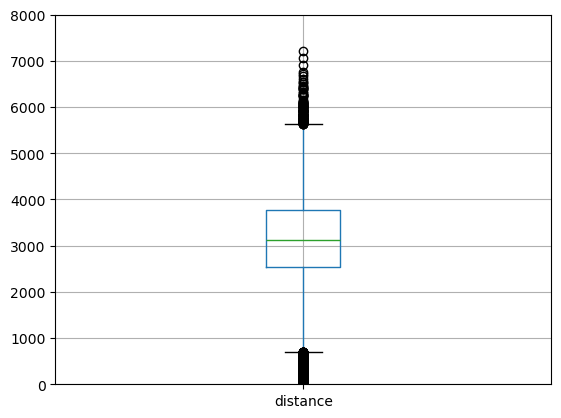

In [10]:
# Округляем значения расстояния до двух знаков после запятой для улучшения точности
df_rides['distance'] = df_rides['distance'].round(2)

# Выводим статистическое описание расстояний (среднее, стандартное отклонение, минимальное, максимальное значения и т.д.)
display(df_rides['distance'].describe())

# Строим боксплот для визуализации распределения расстояний
df_rides.boxplot(column='distance')

# Ограничиваем ось Y от 0 до 8000, чтобы лучше видно было распределение данных
plt.ylim(0, 8000)

# Отображаем график
plt.show()

**Вывод.** Расстояние которое пользователи преодолели за одну поездку составляет в среднем 3070 м, медиана 3133м. Минимальное значение не будет и 1-го метра, что является выбросами, максимальное 7211 м, что тоже является выбросами, так как подобных случаев очень мало! Чаще всего поездки в отрезке от 2543 м - до 3776м 

3.5 продолжительность поездок.

count    18068.000000
mean        17.805017
std          6.091071
min          0.500000
25%         13.600000
50%         17.680000
75%         21.722500
max         40.820000
Name: duration, dtype: float64

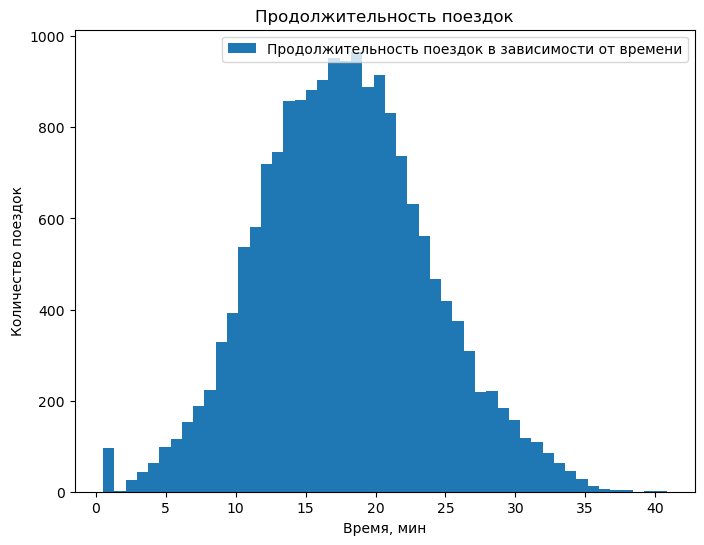

In [11]:
# Округляем значения продолжительности поездок до двух знаков после запятой
df_rides['duration'] = df_rides['duration'].round(2)

# Выводим статистическое описание продолжительности поездок (среднее, стандартное отклонение, минимальное, максимальное значения и т.д.)
display(df_rides['duration'].describe())

# Строим гистограмму для отображения распределения продолжительности поездок
plt.figure(figsize=(8, 6))  # Устанавливаем размер графика
plt.hist(df_rides['duration'], bins=50, label='Продолжительность поездок в зависимости от времени')  # Создаём гистограмму с 50 корзинами (bins)

# Добавляем заголовок и подписи осей
plt.title('Продолжительность поездок')
plt.xlabel('Время, мин')
plt.ylabel('Количество поездок')

# Добавляем легенду
plt.legend(loc='upper right')  

# Отображаем график
plt.show()

**Вывод.** Продолжительность в минутах. Средняя и медиана почти одинакова, по 17,7 минут, почти 18 минут. По гистограмме видно, что даипазон времени поездки входят от 10 мин до 25 мин. В остальные продолжительности поездки были либо меньшими либо большими, т.е. выбросами. 

#### Шаг 4. Объединение данных

4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом `merge()`.

In [12]:
# Объединяем данные о пользователях (df_users) с данными о поездках (df_rides) по общему столбцу 'user_id'
df_1 = df_users.merge(df_rides, on='user_id')

# Далее объединяем df_1 (объединённые пользователи и поездки) с данными о подписках (df_sub) по столбцу 'subscription_type'
df_2 = df_1.merge(df_sub, on='subscription_type')

# Отображаем итоговый датафрейм df_2, который содержит информацию о пользователях, их поездках и подписках
df_2

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,19.82,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,21.41,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,18.44,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,16.67,2021-11-27,11,8,50,0


4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [13]:
# Создаём датафрейм с данными о пользователях без подписки
df_without_sub = df_2[df_2['subscription_type'] == 'free']

# Создаём датафрейм с данными о пользователях с подпиской (выбираем все, где тип подписки не 'free')
df_with_sub = df_2[df_2['subscription_type'] != 'free']

# Отображаем датафрейм с пользователями без подписки
display(df_without_sub)

# Отображаем датафрейм с пользователями с подпиской
display(df_with_sub)

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,14.94,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,16.23,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,20.02,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,9.78,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,17.43,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,19.82,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,21.41,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,18.44,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,16.67,2021-11-27,11,8,50,0


,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.05,24.67,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.70,15.89,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.16,14.39,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.85,15.84,2021-10-17,10,6,0,199


**Вывод.** Соединил таблицы по столбцам user_id и subscription_type. И разделил на 2 разные талблицы по subscription_type, где пользователи с подпиской и без

4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

'Информация о времени поездки для пользователей с подпиской'

count    6500.000000
mean       18.542017
std         5.572065
min         3.760000
25%        14.527500
50%        18.180000
75%        21.880000
max        40.820000
Name: duration, dtype: float64

'Информация о времени поездки для пользователей без подписки'

count    11473.000000
mean        17.530762
std          6.162628
min          2.040000
25%         13.090000
50%         17.380000
75%         21.640000
max         34.950000
Name: duration, dtype: float64

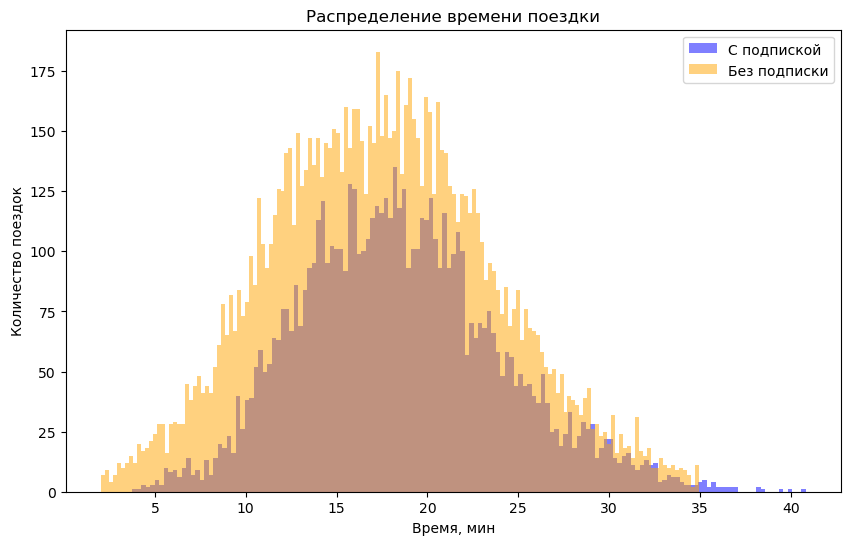

In [14]:
# Фильтруем пользователей без подписки, исключая те поездки, где продолжительность меньше или равна 1 минуте
df_without_sub = df_without_sub[df_without_sub['duration'] > 1]

# Выводим статистику по продолжительности поездок для пользователей с подпиской
display('Информация о времени поездки для пользователей с подпиской', df_with_sub['duration'].describe())

# Выводим статистику по продолжительности поездок для пользователей без подписки
display('Информация о времени поездки для пользователей без подписки', df_without_sub['duration'].describe())

# Строим гистограмму для отображения распределения продолжительности поездок для пользователей с подпиской и без
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
plt.hist(df_with_sub['duration'], bins=150, alpha=0.5, label='С подпиской', color='blue')  # Гистограмма для пользователей с подпиской
plt.hist(df_without_sub['duration'], bins=150, alpha=0.5, label='Без подписки', color='orange')  # Гистограмма для пользователей без подписки

# Добавляем заголовок и подписи осей
plt.title('Распределение времени поездки')
plt.xlabel('Время, мин')
plt.ylabel('Количество поездок')

# Добавляем легенду для различения категорий
plt.legend(loc='upper right')

# Отображаем график
plt.show()

'Информация о расстоянии для пользователей с подпиской'

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

'Информация о расстоянии для пользователей без подписки'

count    11473.000000
mean      3028.374240
std       1235.541051
min          0.860000
25%       2360.880000
50%       3102.080000
75%       3883.980000
max       7066.000000
Name: distance, dtype: float64

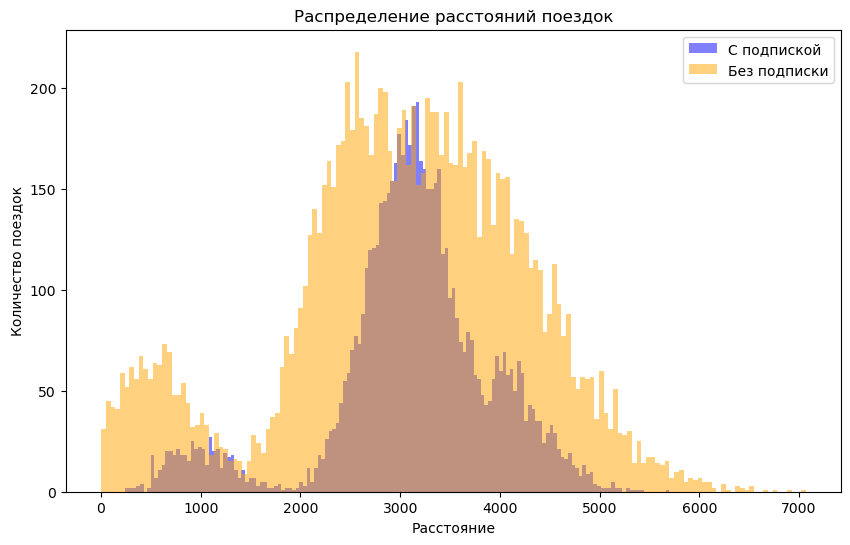

In [15]:
# Выводим статистику по расстояниям поездок для пользователей с подпиской
display('Информация о расстоянии для пользователей с подпиской', df_with_sub['distance'].describe())

# Выводим статистику по расстояниям поездок для пользователей без подписки
display('Информация о расстоянии для пользователей без подписки', df_without_sub['distance'].describe())

# Строим гистограмму для отображения распределения расстояний поездок для пользователей с подпиской и без
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
plt.hist(df_with_sub['distance'], bins=150, alpha=0.5, label='С подпиской', color='blue')  # Гистограмма для пользователей с подпиской
plt.hist(df_without_sub['distance'], bins=150, alpha=0.5, label='Без подписки', color='orange')  # Гистограмма для пользователей без подписки

# Добавляем заголовок и подписи осей
plt.title('Распределение расстояний поездок')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')

# Добавляем легенду для различения категорий
plt.legend(loc='upper right')

# Отображаем график
plt.show()

**Вывод.** По гистограмме видно, что пользователей без подписки больше 
1. Время поездки 
- Пользователи без подписки в количестве 95 единиц приезжали до своего место назначения менее чем за минуту в дистанции от 4000 до 7000 м. Это означает, что пользователь выключил навигатор/приложение как только вел маршрут и такие данные нужно убрать, т.к. они искажают общую картину. 
- Для 11442 единиц пользователей без подписки (после очистки подписчиков), время поездки среднее - 17,5 мин, мадианное - 17,4 мин
- Для пользователей с подпиской среднее время пользования - 18,5 мин, медианное - 18,2 мин 
2. Расстояние поездки
- Для 6500 единиц подписчиков: расстояние среднее - 3115м, мадианное - 3148м; время поездки среднее - 17,4мин, мадианное - 17,3мин
- Для 11473 единиц пользователей без подписки (после очистки подписчиков), расстояние среднее - 3028м, мадианное - 3102м



#### Шаг 5. Подсчёт выручки

5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [16]:
# Округляем продолжительность поездки до целых значений для обоих датафреймов (с подпиской и без подписки)
df_with_sub['duration'] = np.ceil(df_with_sub['duration'])
df_without_sub['duration'] = np.ceil(df_without_sub['duration'])

# Создаём агрегированный датафрейм для пользователей без подписки, используя pivot_table
# Считаем суммарное расстояние, количество поездок и суммарное время для каждого пользователя по каждому месяцу
df_without_sub_sum_count = df_without_sub.pivot_table(
    index=['user_id', 'month_number'],  # Индекс: идентификатор пользователя и месяц
    values=['distance', 'duration'],    # Столбцы для агрегации: расстояние и продолжительность
    aggfunc={'distance': ['sum', 'count'], 'duration': 'sum'},  # Аггрегация: сумма расстояния, количество поездок и сумма времени
    fill_value=0  # Заполняем пропуски нулями
).reset_index()  # Сбрасываем индексы для корректного отображения
df_without_sub_sum_count.columns = ['user_id', 'month_number', 'trip_count', 'distance_sum', 'duration_sum']  # Переименовываем столбцы для удобства

# Отображаем первые строки агрегированного датафрейма для пользователей без подписки
display(df_without_sub_sum_count.head())

# Создаём агрегированный датафрейм для пользователей с подпиской
# Также считаем суммарное расстояние, количество поездок и суммарное время для каждого пользователя по каждому месяцу
df_with_sub_sum_count = df_with_sub.pivot_table(
    index=['user_id', 'month_number'],  # Индекс: идентификатор пользователя и месяц
    values=['distance', 'duration'],    # Столбцы для агрегации: расстояние и продолжительность
    aggfunc={'distance': ['sum', 'count'], 'duration': 'sum'},  # Аггрегация: сумма расстояния, количество поездок и сумма времени
    fill_value=0  # Заполняем пропуски нулями
).reset_index()  # Сбрасываем индексы
df_with_sub_sum_count.columns = ['user_id', 'month_number', 'trip_count', 'distance_sum', 'duration_sum']  # Переименовываем столбцы для удобства

# Отображаем первые строки агрегированного датафрейма для пользователей с подпиской
display(df_with_sub_sum_count.head())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4136\750277877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_sub['duration'] = np.ceil(df_with_sub['duration'])


,user_id,month_number,trip_count,distance_sum,duration_sum
0,700,1,1,2515.69,15.0
1,700,2,5,13446.65,89.0
2,700,3,1,3798.33,19.0
3,700,4,1,2984.55,16.0
4,700,6,2,5927.65,29.0


,user_id,month_number,trip_count,distance_sum,duration_sum
0,1,1,2,7027.51,42.0
1,1,4,1,754.16,7.0
2,1,8,2,6723.47,46.0
3,1,10,2,5809.91,32.0
4,1,11,3,7003.50,56.0


5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;


с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно. 


Помесячная выручка считается по формуле: 
стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

In [17]:
# Для пользователей без подписки вычисляем помесячную выручку
# Формула: (стоимость старта * количество поездок) + (стоимость одной минуты * общая продолжительность всех поездок) + (абонентская плата)
# Для пользователей без подписки абонентская плата = 0, стоимость минуты = 8 рублей, стоимость старта = 50 рублей
subscription_fee_for_free = 0  # Абонентская плата для пользователей без подписки
one_min_cost_free = 8  # Стоимость одной минуты для пользователей без подписки
start_cost_free = 50  # Стоимость старта для пользователей без подписки

# Вычисляем помесячную выручку для пользователей без подписки
df_without_sub_sum_count['month_revenue'] = (start_cost_free * df_without_sub_sum_count['trip_count'] + 
                                              df_without_sub_sum_count['duration_sum'] * one_min_cost_free + 
                                              subscription_fee_for_free)

# Для пользователей с подпиской вычисляем помесячную выручку
# Формула аналогична, но с другими значениями для подписки: абонентская плата = 199 рублей, стоимость минуты = 6 рублей, стоимость старта = 0 рублей
subscription_fee = 199  # Абонентская плата для пользователей с подпиской
one_min_cost = 6  # Стоимость одной минуты для пользователей с подпиской
start_cost = 0  # Стоимость старта для пользователей с подпиской

# Вычисляем помесячную выручку для пользователей с подпиской
df_with_sub_sum_count['month_revenue'] = (start_cost * df_with_sub_sum_count['trip_count'] + 
                                           df_with_sub_sum_count['duration_sum'] * one_min_cost + 
                                           subscription_fee)

# Отображаем датафреймы с помесячной выручкой для пользователей с подпиской и без подписки
display(df_without_sub_sum_count)
display(df_with_sub_sum_count)

,user_id,month_number,trip_count,distance_sum,duration_sum,month_revenue
0,700,1,1,2515.69,15.0,170.0
1,700,2,5,13446.65,89.0,962.0
2,700,3,1,3798.33,19.0,202.0
3,700,4,1,2984.55,16.0,178.0
4,700,6,2,5927.65,29.0,332.0
...,...,...,...,...,...,...
6762,1534,6,2,3409.47,26.0,308.0
6763,1534,8,2,7622.45,48.0,484.0
6764,1534,9,1,4928.17,23.0,234.0
6765,1534,11,4,13350.02,78.0,824.0


,user_id,month_number,trip_count,distance_sum,duration_sum,month_revenue
0,1,1,2,7027.51,42.0,451.0
1,1,4,1,754.16,7.0,241.0
2,1,8,2,6723.47,46.0,475.0
3,1,10,2,5809.91,32.0,391.0
4,1,11,3,7003.50,56.0,535.0
...,...,...,...,...,...,...
4528,699,6,1,4072.80,17.0,301.0
4529,699,8,2,7018.33,45.0,469.0
4530,699,9,2,6364.86,31.0,385.0
4531,699,10,1,4707.85,16.0,295.0


**Вывод.** Помесячная выручка посчитана по указанной формуле. 

#### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

In [18]:
# Проверка гипотезы о продолжительности поездок для пользователей с и без подписки

# Формулировка гипотез:
# Нулевая гипотеза (H₀): Средняя продолжительность поездки у пользователей с подпиской равна средней продолжительности у пользователей без подписки.
# Альтернативная гипотеза (H₁): Средняя продолжительность поездки у пользователей с подпиской отличается от средней продолжительности у пользователей без подписки.

# Выполняем независимый t-тест для двух выборок (пользователи с подпиской и без подписки)
# Используем продолжительность поездки по столбцу 'duration_sum' в агрегированных данных
results = st.ttest_ind(df_with_sub_sum_count['duration_sum'], df_without_sub_sum_count['duration_sum'])

# Уровень значимости для теста (по умолчанию 0.05)
alpha = 0.05

# Выводим p-value для проверки гипотезы
print(f'p-value: {results.pvalue}')

# Проверка гипотезы:
# Если p-value меньше уровня значимости, отвергаем нулевую гипотезу, иначе не отвергаем.
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: средняя продолжительность поездки у пользователей с подпиской отличается от без подписки.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимой разницы в средней продолжительности поездки.")

p-value: 1.37652087248219e-24
Отвергаем нулевую гипотезу: средняя продолжительность поездки у пользователей с подпиской отличается от без подписки.


In [19]:
# Просмотр описательной статистики по суммарной продолжительности поездок для пользователей без подписки
display(df_without_sub_sum_count['duration_sum'].describe())  # Показываем статистику по продолжительности для пользователей без подписки

# Просмотр описательной статистики по суммарной продолжительности поездок для пользователей с подпиской
display(df_with_sub_sum_count['duration_sum'].describe())  # Показываем статистику по продолжительности для пользователей с подпиской

# Проверяем суммарную продолжительность всех поездок для пользователей без подписки
display('суммарная длительность пользования без подписки', df_without_sub_sum_count['duration_sum'].sum())  # Суммируем продолжительность для пользователей без подписки

# Проверяем суммарную продолжительность всех поездок для пользователей с подпиской
display('суммарная длительность пользования с подпиской', df_with_sub_sum_count['duration_sum'].sum())  # Суммируем продолжительность для пользователей с подпиской

count    6767.000000
mean       30.561844
std        17.798731
min         3.000000
25%        18.000000
50%        26.000000
75%        40.000000
max       143.000000
Name: duration_sum, dtype: float64

count    4533.000000
mean       27.287668
std        14.706956
min         4.000000
25%        17.000000
50%        22.000000
75%        35.000000
max       126.000000
Name: duration_sum, dtype: float64

'суммарная длительность пользования без подписки'

206812.0

'суммарная длительность пользования с подпиской'

123695.0

**Вывод.** 
Гипотезы: 
1. Нулевая гипотеза (H₀): Средняя продолжительность поездки у пользователей с подпиской равна средней продолжительности у пользователей без подписки.
2. Альтернативная гипотеза (H₁): Средняя продолжительность поездки у пользователей с подпиской отличается от средней продолжительности у пользователей без подписки.
р-значение p-value: 1.37652087248219e-24 и это означает отвергаем нулевую гипотезу: средняя продолжительность поездки у пользователей с подпиской отличается от без подписки.

Без подписки пользователи пользуются:
- Без подписки в среднем - 30,5 мин и в медиане - 26 мин, суммарное время пользование - 207 тыс мин
- С подпиской в среднем - 27,3 мин и в медиане - 22 мин, суммарное время пользование - 124 тыс мин

Таким образом, средный проезд и суммарное время пользование пользователей без подписки больше, чем с подпиской!

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

In [20]:
# Формулировка гипотез:
# Нулевая гипотеза (H₀): Среднее расстояние на поездки у пользователей с подпиской = 3130 метров
# Альтернативная гипотеза (H₁): Среднее расстояние на поездки у пользователей с подпиской <= 3130 метров

# Задаем интересующее нас значение (3130 метров)
interested_value = 3130

# Уровень значимости для теста (по умолчанию 0.05)
alpha = 0.05

# Выполняем однообразный t-тест для одной выборки.
# Мы проверяем, отличается ли среднее расстояние пользователей с подпиской от 3130 метров.
# Здесь используем параметр 'greater' для теста на одну сторону, так как гипотеза предполагает, что среднее не должно превышать 3130 метров.
results = st.ttest_1samp(df_with_sub['distance'], interested_value, alternative='greater')

# Выводим p-value для проверки гипотезы
print('p-значение:', results.pvalue)

# Проверка гипотезы:
# Если p-value меньше уровня значимости, отвергаем нулевую гипотезу, иначе не отвергаем.
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Среднее расстояние больше 3130 метров')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Среднее расстояние не больше 3130 метров')

# Описательная статистика для расстояний у пользователей с подпиской
print(df_with_sub['distance'].describe())

p-значение: 0.9195362605842414
Не получилось отвергнуть нулевую гипотезу: Среднее расстояние не больше 3130 метров
count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64


**Вывод.** 

**Вывод.** 
Гипотезы: 
1. Нулевая гипотеза H₀: Среднее расстояние на поездки у пользователей с подпиской = 3130
2. Альтернативная гипотеза H₁: Среднее время на поездки у пользователей с подпиской <= 3130

p-значение: 0.9195362605842414
Не получилось отвергнуть нулевую гипотезу: Среднее расстояние не больше 3130 метров

Проверил гипотезу, не превышает ли поездка 3130 метров. Действительно, среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров!

Для проверки, проверил среднее значение на предмет разделение письменном виде диаграммы размаха. Не получилось отвергнуть нулевую гипотезу

6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

In [21]:
# Выделяем данные о помесячной выручке для пользователей с подпиской и без подписки
df_with_sub_revenue = df_with_sub_sum_count['month_revenue']
df_without_sub_revenue = df_without_sub_sum_count['month_revenue']

# Формулировка гипотез:
# Нулевая гипотеза (H₀): Средняя выручка от пользователей с подпиской равна средней выручке от пользователей без подписки.
# Альтернативная гипотеза (H₁): Средняя выручка от пользователей с подпиской больше, чем от пользователей без подписки.

# Уровень значимости
alpha = 0.05

# Выполняем t-тест для двух независимых выборок, проверяя, отличается ли средняя выручка от подписчиков от выручки без подписки.
# Параметр 'greater' указывает на то, что мы проверяем гипотезу, что выручка от пользователей с подпиской выше.
results = st.ttest_ind(df_with_sub_revenue, df_without_sub_revenue, alternative='greater')

# Выводим p-value для проверки гипотезы
print('p-значение:', results.pvalue)

# Проверка гипотезы:
# Если p-value меньше уровня значимости, отвергаем нулевую гипотезу и утверждаем, что выручка от пользователей с подпиской больше.
# Если p-value больше или равно уровню значимости, не отвергаем нулевую гипотезу.
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: выручка от пользователей с подпиской больше.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: выручка от пользователей с подпиской не больше.')

p-значение: 1.957394033609321e-30
Отвергаем нулевую гипотезу: выручка от пользователей с подпиской больше.


In [22]:
# Выводим описание статистики по помесячной выручке для пользователей с подпиской
display(df_with_sub_sum_count['month_revenue'].describe())

# Выводим описание статистики по помесячной выручке для пользователей без подписки
display(df_without_sub_sum_count['month_revenue'].describe())

count    4533.000000
mean      362.726009
std        88.241734
min       223.000000
25%       301.000000
50%       331.000000
75%       409.000000
max       955.000000
Name: month_revenue, dtype: float64

count    6767.000000
mean      329.266440
std       183.215022
min        74.000000
25%       194.000000
50%       274.000000
75%       428.000000
max      1444.000000
Name: month_revenue, dtype: float64

**Вывод.** 

**Вывод.** 
Гипотезы: 
1. Нулевая гипотеза H₀: Средняя выручка от пользователей с подпиской = Средняя выручка от пользователей без подписки
2. Альтернативная гипотеза H₁: Средняя выручка от пользователей с подпиской > Средняя выручка от пользователей без подписки

p-значение: 1.957394033609321e-30
Отвергаем нулевую гипотезу. Средняя выручка от пользователей с подпиской больше средней выручки от пользователей без подписки

Результат теста показывает, что средняя выручка пользователей с подпиской действительно выше, чем у пользователей без подписки, на статистически значимом уровне. 
- С подпиской: средняя - 362 руб, медиана - 331 руб
- Без подписки: средняя - 329 руб, медиана - 274 руб

6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Вывод.** 

как проверять гипотезу, если вы анализируете одну генеральную совокупность, с которой произошли некоторые изменения. В этом случае вы будете проверять, равны ли средние совокупности до и после этого изменения.
Гипотезы в таком случае будут сформулированы так: 
- Н0: μ1 = μ2
- Н1: μ1 != μ2

где, μ1, μ2 средние значения до и после изменения.

Таким образом, используется **Гипотеза о равенстве средних для зависимых (парных) выборок**

#### Шаг 7. Распределения

7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

In [23]:
p = 0.1  # Вероятность продления подписки
k = 100  # Минимальное количество продлений
target_prob = 0.05  # Целевая вероятность невыполнения плана

# Перебираем n в цикле
for n in range(1, 2000):  # Проверяем n от 1 до 2000
    # Вычисляем P(X < 100) для текущего n
    prob = binom.cdf(k - 1, n, p)  # P(X < 100) = P(X <= 99)
    
    # Если вероятность <= 0.05, останавливаем цикл
    if prob <= target_prob:
        print(f"Минимальное количество промокодов: {n}")
        print(f"Вероятность P(X < 100) = {prob:.4f}")
        break
# Выводим минимальное количество промокодов
print(f"Минимальное количество промокодов, которое нужно разослать: {n}")

Минимальное количество промокодов: 1161
Вероятность P(X < 100) = 0.0498
Минимальное количество промокодов, которое нужно разослать: 1161


7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [24]:
# Параметры задачи
n = 1000000  # количество уведомлений
p = 0.4  # вероятность того, что клиент откроет уведомление
k = 399500  # количество пользователей, которые открыли уведомление

# Аппроксимация биномиального распределения нормальным
mu = n * p  # Среднее значение
sigma = np.sqrt(n * p * (1 - p))  # Стандартное отклонение

# Нормализуем к Z-значению для нормального распределения
z = (k - mu) / sigma

# Вероятность того, что уведомление откроет не более 399500 пользователей
probability = norm.cdf(z)

# Выводим вероятность
print(f"Вероятность того, что откроют уведомление не более 399500 пользователей: {probability:.4f}")

Вероятность того, что откроют уведомление не более 399500 пользователей: 0.1537


**Вывод**

Видимо я плохо понял эту тему, мне необходимо заново пройти тему распределений. Так как, я не смог решить эти задачи 

**Задача.** Проанализировать данные сервиса аренды самокатов GoFast и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

**Дано.** Данные о некоторых пользователях из нескольких городов, а также об их поездках. 

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
1. без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;
2. с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

**Проделанная работа.** 
1. Загрузка данных
- Были загружены данные и изучены общие информации.  
2. Предобработка данных
- Проверка типов данных, наличие дубликатов с последующим их удалением и добавление столбца с номер порядкового месяца. 
3. Исследовательский анализ данных. 
- частота встречаемости городов. В таблице всего 8 городов из которых в топ-3 входят Пятигорск (14.3%), Екатеринбург (13.3%) и Ростов-на-Дону (12.91%)
- соотношение пользователей с подпиской и без подписки. Без подписки - 54.43%, платные - 45.57%
- Возраст пользователей. Возраст пользователей разные и варьируется 12 - 43 лет. Возраст самых частых пользователей находиться в отрезке 22 - 28 лет.
- Расстояние, которое пользователь преодолел за одну поездку - составляет в среднем 3070 м, медиана 3133м. 
- Продолжительность поездок. Средняя и медиана почти одинакова, по 17,7 минут, почти 18 минут. В гистограмме, что диапазон времени поездки входят от 10 мин до 25 мин.  
4. Объединение данных
- Объедините данные о пользователях в один датафрейм.
- Разделить на 2 датафрейма данными о пользователях с/без подписки.
- Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий. Удаление аномалий. Для 6500 единиц подписчиков: расстояние среднее - 3115м, медианное - 3148м; время поездки среднее - 17,4мин, медианное - 17,3мин. Для 11473 пользователей без подписки расстояние среднее - 3028м, медианное - 3102м; время поездки среднее - 17,5 мин, медианное - 17,4 мин
5. Подсчёт выручки. Месячная выручка подсчитана. 
6. Проверка гипотез.
- тратят ли пользователи с подпиской больше времени на поездки? Были проведены гипотезы и  выяснилось, что нулевая гипотеза отвергается: средняя продолжительность поездки у пользователей с подпиской отличается от без подписки.
Без подписки в среднем - 30,5 мин и в медиане - 26 мин, суммарное время пользование - 207 тыс мин.
С подпиской в среднем - 27,3 мин и в медиане - 22 мин, суммарное время пользование - 124 тыс мин. 
- Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 м? Были проведены гипотезы и  выяснилось, что нулевая гипотеза не отвергается: Среднее расстояние не больше 3130 метров. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров! 
- Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки? Были проведены гипотезы и  выяснилось, что нулевая гипотеза отвергается: p-значение 1.957394033609321e-30 Отвергаем нулевую гипотезу. Средняя выручка от пользователей с подпиской больше средней выручки от пользователей без подписки. 
Средняя выручка пользователей с подпиской действительно выше, чем у пользователей без подписки. С подпиской: средняя - 362 руб, медиана - 331 руб, без подписки: средняя - 329 руб, медиана - 274 руб



**Итог.** 

Подписчики показывают более высокие показатели по выручке, но тратят меньше времени на поездки и преодолевают меньшее расстояние по сравнению с пользователями без подписки. По этой причине, увеличивать количество подписчиков прямо пропорционально увеличению дохода. 